<a href="https://colab.research.google.com/github/JoaoPedroBFerreira/RedeNeural/blob/main/RedeNeuralSigmoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Código equivalente ao código anterior, mas agora com uma rede neural de duas camadas, onde cada camada tem um neurônio. A primeira camada recebe as entradas, e a segunda camada recebe a saída da primeira camada como entrada. Vamos usar o mesmo dataset fictício (problema XOR) e permitir a escolha de funções de ativação.

Nomes : João Pedro Boanerges Ferreira e Henrique Costa Gomes -
Matriculas : 202210700 e 202210908


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Funções de ativação
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# Derivadas das funções de ativação (para o gradiente)
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# Dataset fictício (peso e altura como entradas, gênero como saída)
X = np.array([[0.70, 0.875], [0.60, 0.8], [0.80, 0.925], [0.50, 0.775]])  # Entradas: Peso e Altura
y = np.array([[1], [0], [1], [0]])  # Saída: Gênero (1 para Masculino, 0 para Feminino)

# Hiperparâmetros
learning_rate = 0.1
epochs = 10000

# Inicialização dos pesos e viés
np.random.seed(42)
# Camada 1: 2 entradas -> 1 neurônio
weights_1 = np.random.randn(2, 1)
bias_1 = np.random.randn()

# Camada 2: 1 entrada (saída da camada 1) -> 1 neurônio
weights_2 = np.random.randn(1, 1)
bias_2 = np.random.randn()

# Escolha da função de ativação
activation_function = sigmoid
activation_derivative = sigmoid_derivative

# Treinamento da rede
errors = []
for epoch in range(epochs):
    # Forward pass
    # Camada 1
    weighted_sum_1 = np.dot(X, weights_1) + bias_1
    output_1 = activation_function(weighted_sum_1)

    # Camada 2
    weighted_sum_2 = np.dot(output_1, weights_2) + bias_2
    output_2 = activation_function(weighted_sum_2)

    # Cálculo do erro (erro quadrático médio)
    error = y - output_2
    errors.append(np.mean(np.square(error)))

    # Backpropagation
    # Gradiente da camada 2
    d_error = -2 * error / len(X)
    d_output_2 = activation_derivative(weighted_sum_2)
    gradient_2 = d_error * d_output_2

    # Gradiente da camada 1
    d_output_1 = activation_derivative(weighted_sum_1)
    gradient_1 = np.dot(gradient_2, weights_2.T) * d_output_1

    # Atualização dos pesos e viés
    weights_2 -= learning_rate * np.dot(output_1.T, gradient_2)
    bias_2 -= learning_rate * np.sum(gradient_2)

    weights_1 -= learning_rate * np.dot(X.T, gradient_1)
    bias_1 -= learning_rate * np.sum(gradient_1)

    # Exibir progresso a cada 1000 épocas
    if epoch % 1000 == 0:
        print(f"Época {epoch}, Erro: {errors[-1]}")


Época 0, Erro: 0.2860667724776532
Época 1000, Erro: 0.24352651100871076
Época 2000, Erro: 0.23626099587744115
Época 3000, Erro: 0.22004039303273432
Época 4000, Erro: 0.1881621058384943
Época 5000, Erro: 0.14396360949131146
Época 6000, Erro: 0.10392471285076071
Época 7000, Erro: 0.07643353638400777
Época 8000, Erro: 0.05860220377508208
Época 9000, Erro: 0.046523348010910515


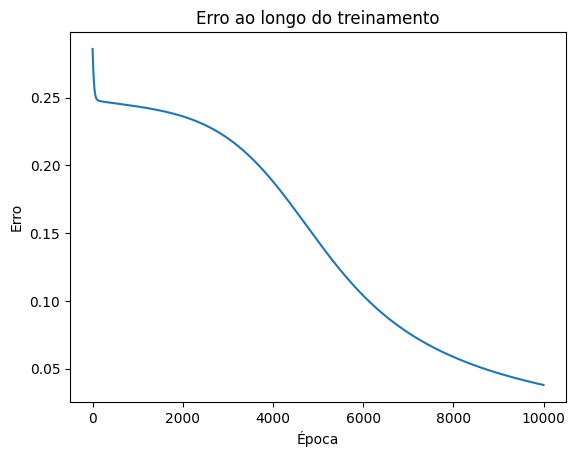


Teste da rede treinada:
Entrada: [0.7   0.875], Saída esperada: [1], Saída da rede: [0.73921185]
Entrada: [0.6 0.8], Saída esperada: [0], Saída da rede: [0.27278083]
Entrada: [0.8   0.925], Saída esperada: [1], Saída da rede: [0.93804695]
Entrada: [0.5   0.775], Saída esperada: [0], Saída da rede: [0.07260009]


In [19]:
# Plot do erro ao longo do treinamento
plt.plot(range(epochs), errors)
plt.title("Erro ao longo do treinamento")
plt.xlabel("Época")
plt.ylabel("Erro")
plt.show()

# Teste da rede treinada
print("\nTeste da rede treinada:")
for i in range(len(X)):
    # Forward pass
    weighted_sum_1 = np.dot(X[i], weights_1) + bias_1
    output_1 = activation_function(weighted_sum_1)

    weighted_sum_2 = np.dot(output_1, weights_2) + bias_2
    output_2 = activation_function(weighted_sum_2)

    print(f"Entrada: {X[i]}, Saída esperada: {y[i]}, Saída da rede: {output_2}")